In [75]:
import seaborn as sns
from matplotlib import pyplot as plt, cm
import numpy as np
import pandas as pd

In [76]:
url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/5_OneCatSevNumOrdered.csv'
data = pd.read_csv(url)
print(data.shape)
print(data.columns)
print(data.head())

(1161, 5)
Index(['year', 'sex', 'name', 'n', 'prop'], dtype='object')
   year sex     name    n      prop
0  1880   F    Helen  636  0.006516
1  1880   F   Amanda  241  0.002469
2  1880   F    Betty  117  0.001199
3  1880   F  Dorothy  112  0.001147
4  1880   F    Linda   27  0.000277


# Lineplot
The most obvious solution to represent the popularity of these names is a line chart, one for each name.

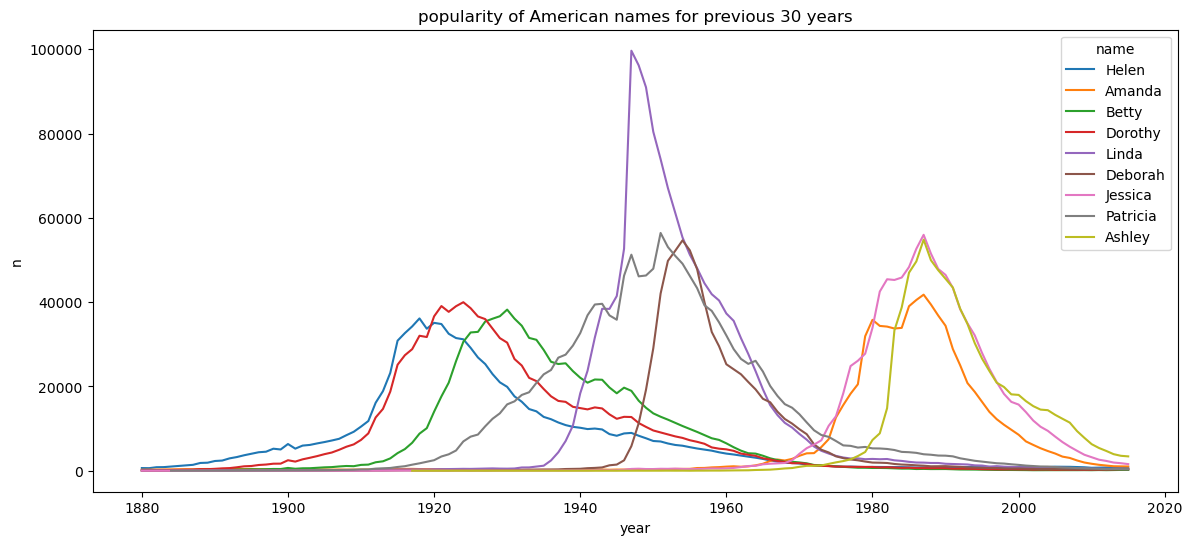

In [77]:
plt.figure(figsize=(14,6))
sns.lineplot(x="year", y="n", hue="name", data=data)
# sns.lineplot(x="year", y="n", hue="name", data=data, palette=sns.color_palette("icefire", len(np.unique(data.name))))
plt.title("popularity of American names for previous 30 years")
plt.show()

## Highlighted

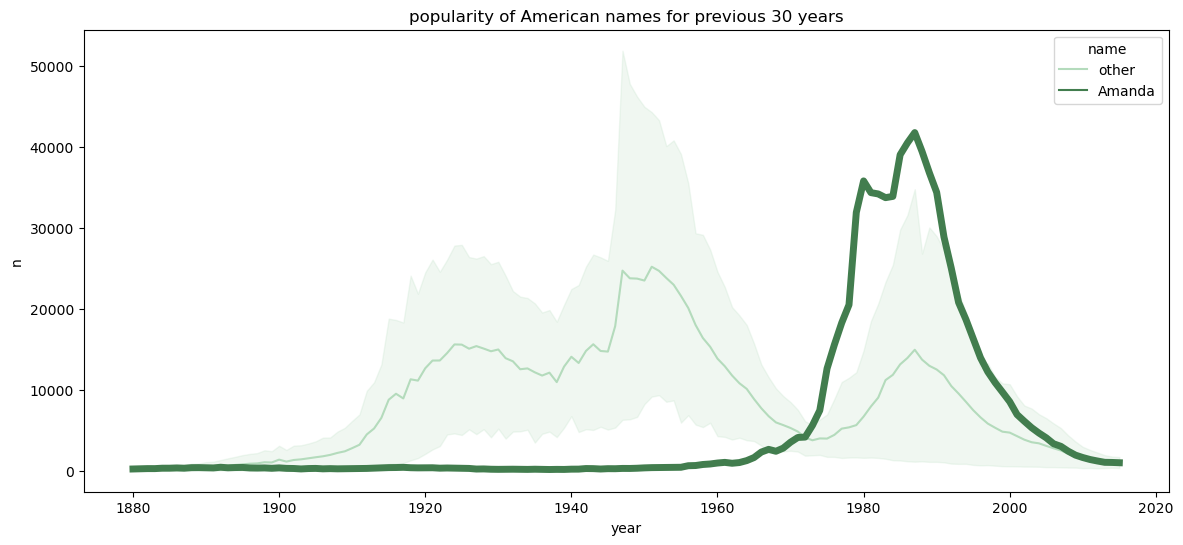

41786 Amandas were born in 1987


In [78]:
data['name'] = ['Amanda' if name=='Amanda' else 'other' for name in data['name']]
plt.figure(figsize=(14,6))

# plot the others
palette = sns.cubehelix_palette(n_colors=1, start=2, rot=0, dark=0, light=.8, reverse=True)
for name in np.unique(data['name']):
    if name == 'Amanda': continue
    ax = sns.lineplot(data=data[data['name']==name], x='year', y='n', hue='name', palette=palette)

# plot amanda
name = 'Amanda'
palette = sns.cubehelix_palette(n_colors=1, start=2, rot=0, dark=0, light=.4, reverse=True)
ax = sns.lineplot(data=data[data['name']==name], x='year', y='n', hue='name', palette=palette, linewidth=5)

# sns.lineplot(x="year", y="n", hue="name", data=data)
plt.title("popularity of American names for previous 30 years")
plt.show()

amanda = data[['year', 'n']][data['name'] == 'Amanda']
most_index = amanda['n'].to_list().index(max(amanda['n']))
print(f'{amanda["n"].to_list()[most_index]} Amandas were born in {amanda["year"].to_list()[most_index]}')


data = pd.read_csv(url)


# Area Chart

<Figure size 1400x600 with 0 Axes>

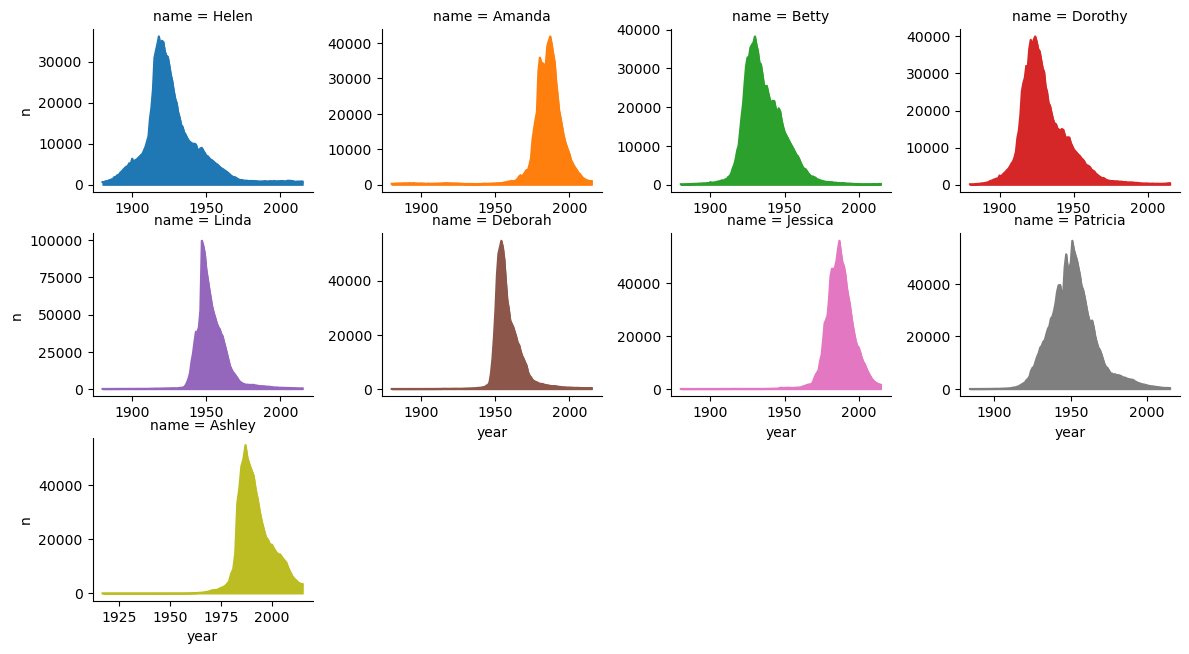

In [79]:
plt.figure(figsize=(14,6))
ax = sns.FacetGrid(data, col="name", col_wrap=4, sharex=False, sharey=False,hue='name')
ax.map(sns.lineplot, "year", "n")
ax.map(plt.fill_between, "year", "n")
plt.subplots_adjust(top=0.7)
plt.show()

# Stack Area Chart

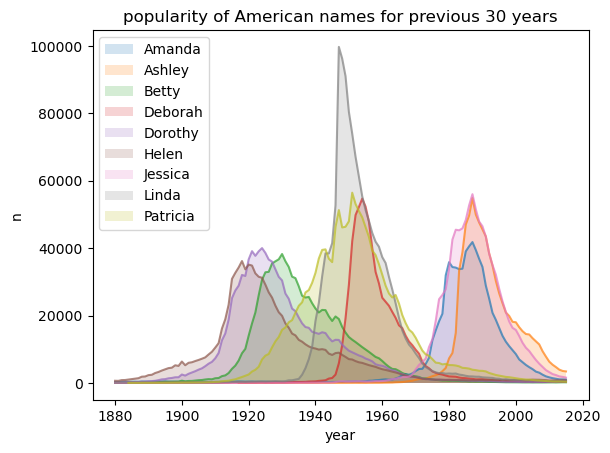

In [80]:
fig, ax = plt.subplots()
for name in np.unique(data['name']):
    namedata = data[data['name']==name]
    sns.lineplot(data=namedata, x='year', y='n', ax=ax, alpha=0.7)
    ax.fill_between(namedata['year'], namedata['n'], 0, alpha=0.2, label=name)
    plt.legend()
plt.title('popularity of American names for previous 30 years')
plt.show()
    

## Percent

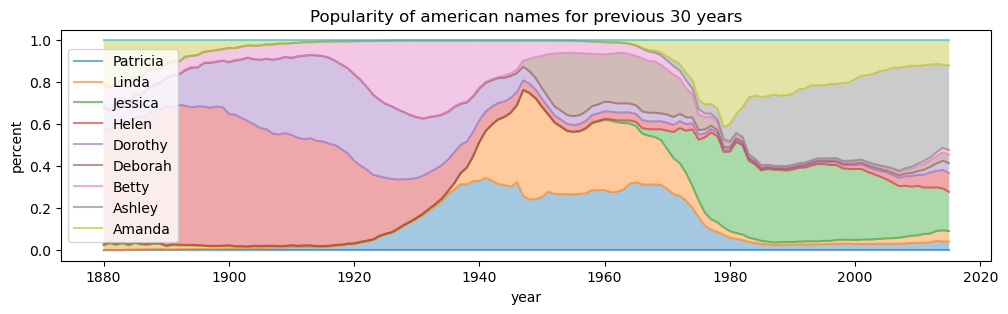

In [81]:
plt.figure(figsize=[12, 3])

names = np.unique(data['name'])[::-1]
total_columns = ['year', 'name', 'n']
total_data = pd.DataFrame(columns=total_columns)


X = []
Y = []
for year in np.unique(data['year']):
    yeardata = data[data['year']==year]
    total = sum(yeardata['n'])
    x = year
    y = [0]
    for name in names:
        yi = yeardata[yeardata['name']==name].values
        if len(yi) == 0:
            y.append(0)
        else:
            y.append(yi[0][3])
    for i in range(1, len(y)):
        y[i] += y[i-1]
    y = [yi / total for yi in y]
    X.append(x)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

plt.plot(X, Y, alpha=0.6, label=names.tolist() + [''])
for i in range(1, Y.shape[1]):
    yi = Y[:, i  ]
    yj = Y[:, i-1]
    plt.fill_between(X, yi, yj, alpha=0.4)
plt.legend()
plt.title("Popularity of american names for previous 30 years")
plt.xlabel("year")
plt.ylabel("percent")
plt.show()


# Stream Graph

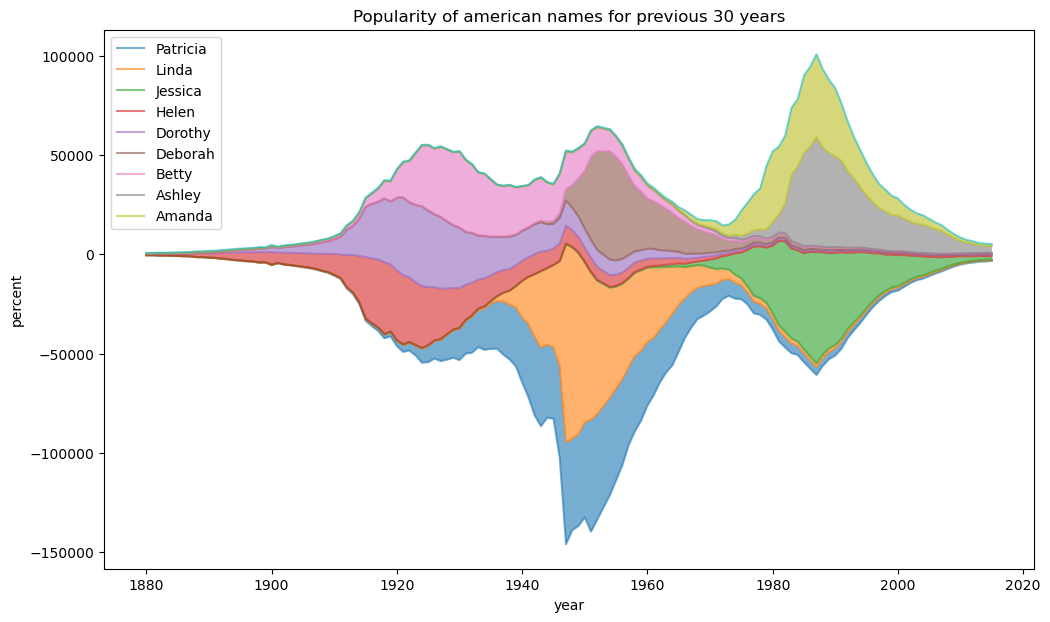

In [82]:
plt.figure(figsize=[12, 7])

names = np.unique(data['name'])[::-1]
total_columns = ['year', 'name', 'n']
total_data = pd.DataFrame(columns=total_columns)


X = []
Y = []
for year in np.unique(data['year']):
    yeardata = data[data['year']==year]
    total = sum(yeardata['n'])
    x = year
    y = [0]
    for name in names:
        yi = yeardata[yeardata['name']==name].values
        if len(yi) == 0:
            y.append(0)
        else:
            y.append(yi[0][3])
    for i in range(1, len(y)):
        y[i] += y[i-1]
    mean = np.mean(y)
    y = [yi - mean for yi in y]
    X.append(x)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

plt.plot(X, Y, alpha=0.6, label=(names.tolist() + ['']))
for i in range(1, Y.shape[1]):
    yi = Y[:, i  ]
    yj = Y[:, i-1]
    plt.fill_between(X, yi, yj, alpha=0.6)
plt.legend()
plt.title("Popularity of american names for previous 30 years")
plt.xlabel("year")
plt.ylabel("percent")
plt.show()
